# Simulate neural dynamics using a wave model

In this tutorial we will use the geometric eigenmodes and eigenvalues to simulate cortical activity,
 using the [Pang *et al.* (2023)](https://doi.org/10.1038/s41586-023-06098-1) model based on neural
 field theory. Here, the spatiotemporal evolution of activity $\phi(\vec r,t)$ is described by an
 isotropic damped wave equation without regeneration,

$$
\displaystyle \bigg[\frac{1}{\gamma_s^2}\frac{\partial^2}{\partial t^2}
+\frac{2}{\gamma_s}\frac{\partial}{\partial t}+1-r_s^2\nabla^2 \bigg]\phi(\vec r,t)=Q(\vec r,t),
$$

where:
- $\gamma_s$ denotes the temporal damping parameter
- $r_s$ denotes the spatial length scale parameter
- $\nabla^2$ denotes the Laplace-Beltrami operator
- $Q(\vec r,t)$ denotes external input

As in the previous tutorials, we begin by initialising the EigenSolver with a cortical surface and
 medial wall mask, then solve for the first 200 eigenmodes. This time we can try out the macaque data.

In [1]:
from neuromodes.io import fetch_surf
from neuromodes import EigenSolver
from nsbutils.utils import unmask
from nsbutils.plotting import plot_surf
from importlib.resources import files, as_file

mesh, medmask = fetch_surf(species='macaque')
solver = EigenSolver(mesh, mask=medmask).solve(200)

We can then call the `simulate_waves` class method to compute timeseries of neural activity:

In [2]:
sim_ts = solver.simulate_waves()

Note that 1000 timepoints (`nt`) are simulated by default, with a timestep of $10^{-4}$ seconds
 (`dt`), using Gaussian white noise as external input.

To visualise activity, we can first sample a few timepoints from the output and add the medial wall
 back in by using `unmask` from `nsbutils`:

In [3]:
sim_ts_sample = unmask(sim_ts[:, ::240], medmask)  # Sample every 240 time points

Each of these sampled timepoints can be visualised with `plot_surf` from `nsbutils`:

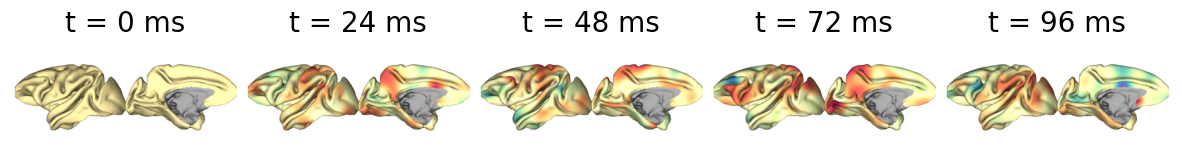

In [4]:
lh_surfpath = files('neuromodes.data') / 'sp-macaque_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
with as_file(lh_surfpath) as lh_surfpath: 
    plot_surf(
        lh_surfpath,
        sim_ts_sample,
        labels=[f't = {i*24} ms' for i in range(5)],
        cmap='Spectral',
        color_range='group'
    )